## **Aniket Zod Patil**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

## 1. Import Library

In [6]:
# !pip install textract
# !pip install python-docx
# !python -m spacy download en_core_web_lg

import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from docx import Document
import spacy
import spacy.displacy

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
os.listdir('/content/drive/MyDrive/Resumes2')
# !sudo apt-get update
# !sudo apt-get install antiword



['Workday',
 'PeopleSoft',
 'React JS Develpoer',
 'SQL Developer',
 '.ipynb_checkpoints']

## 2. Exctract the Text from Dataset

In [8]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes2/PeopleSoft'
for i in os.listdir(directory1):
    if i.endswith('.docx') or i.endswith('.doc'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [9]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,\n|Personal Details ...,PeopleSoft
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
5,\n PeopleSoft Admin/Peo...,PeopleSoft
6,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,PeopleSoft
7,\n\nR Ahmed\n PeopleSoft Technical Consul...,PeopleSoft
8,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
9,\n PeopleSoft D...,PeopleSoft


In [10]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes2/React JS Develpoer'
for i in os.listdir(directory2):
    if i.endswith('.docx') or i.endswith('.pdf') or i.endswith('.doc'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [11]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
1,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
4,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
6,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
8,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer


In [12]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes2/SQL Developer'
for i in os.listdir(directory3):
    if i.endswith('.doc') or i.endswith('.pdf') or i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [13]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
1,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer
4,KAMBALLA PRADEEP ...,SQL Developer
5,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
6,BUDDHA VAMSI ...,SQL Developer
7,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
8,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [14]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes2/Workday'
for i in os.listdir(directory4):
    if i.endswith('.doc') or i.endswith('.pdf') or i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [15]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,\n Har...,Workday
1,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday
2,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
3,\nShireesh ...,Workday
4,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
5,Workday HCM Techno functional Consultant ...,Workday
6,G Himaja\n\n ...,Workday
7,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
8,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
9,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday


## 3. Create a DataFrame

In [16]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,\n|Personal Details ...,PeopleSoft,NaN,NaN,NaN
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,NaN,NaN,NaN,Workday
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday
76,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday
77,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday


In [17]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


### 3.1 Merge all Unnecessary column in One Column

In [18]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,\n|Personal Details ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,NaN,NaN,NaN,Workday,Workday
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday,Workday
76,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday,Workday
77,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday


In [19]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 3.2 Final Dataset

In [20]:
resume_data.head(25)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\n|Personal Details ...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,\n PeopleSoft Admin/Peo...
6,PeopleSoft,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...
7,PeopleSoft,\n\nR Ahmed\n PeopleSoft Technical Consul...
8,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
9,PeopleSoft,\n PeopleSoft D...


In [21]:
resume_data["Raw_Details"][4]

"PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCareer Objective:\n\n\n\nI have total 4.2 Years’ Experience in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability\n\n\n\nProfessional Summary:\n\n\n\n\tHaving 4.2 years of experience in PeopleSoft implementation, Support, People Tools Upgrades, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PUM and Elastic search.\n\n\tInvolved in various Tools and Application Upgrades.\n\n\tExperience in driving Infrastructure Hardware Upgrades, Disaster Recovery Activities.\n\n\tConfigured https and secure web server (SSL) administration.\n\n\tMonitor 

### 3.3 Save new CSV File

In [22]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## 4. Data Understanding

In [23]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\n|Personal Details ...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
...,...,...
74,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
75,Workday,\nVenkateswarlu.B ...
76,Workday,\n Workday Integration Consultant\n\nName...
77,Workday,Srikanth (WORKDAY hCM Consultant)\t ...


In [24]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
58,Workday,\n Har...
59,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...
60,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
61,Workday,\nShireesh ...
62,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
63,Workday,Workday HCM Techno functional Consultant ...
64,Workday,G Himaja\n\n ...
65,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
66,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
67,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...


In [25]:
resume_data[resume_data.Category == 'PeopleSoft']

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\n|Personal Details ...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,\n PeopleSoft Admin/Peo...
6,PeopleSoft,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...
7,PeopleSoft,\n\nR Ahmed\n PeopleSoft Technical Consul...
8,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
9,PeopleSoft,\n PeopleSoft D...


In [26]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### 4.1 Number of Words in each Resume

In [27]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,\n|Personal Details ...,6087
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2058
3,Classification: Internal\n\nClassification: In...,558
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918


### 4.2 Number of Characters

In [28]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,\n|Personal Details ...,11472
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,8689
3,Classification: Internal\n\nClassification: In...,4917
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943


### 4.3 Number of Stopwords

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,\n|Personal Details ...,131
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,186
3,Classification: Internal\n\nClassification: In...,114
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225


### 4.4 Number of Numerics

In [30]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,\n|Personal Details ...,19
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,6
3,Classification: Internal\n\nClassification: In...,7
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4


In [31]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,\n|Personal Details ...,6087,11472,131,19
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2058,8689,186,6
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
...,...,...,...,...,...,...
74,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,955,6542,216,6
75,Workday,\nVenkateswarlu.B ...,3250,9159,188,7
76,Workday,\n Workday Integration Consultant\n\nName...,1521,7695,197,3
77,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9


## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [32]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [33]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 5.2 Clean Text from Resume

In [34]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,\n|Personal Details ...,personal details name pritam biswas date birth...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,profile summary years experience implementing ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
...,...,...,...
74,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,chinna subbarayudu dob march nationality india...
75,Workday,\nVenkateswarlu.B ...,venkateswarlu workday consultant years experie...
76,Workday,\n Workday Integration Consultant\n\nName...,workday integration consultant name sri krishn...
77,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...


### 5.3 Save the Clean Data in new CSV File

In [35]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,personal details name pritam biswas date birth...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
74,Workday,chinna subbarayudu dob march nationality india...
75,Workday,venkateswarlu workday consultant years experie...
76,Workday,workday integration consultant name sri krishn...
77,Workday,srikanth workday hcm consultant seeking suitab...


In [36]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [37]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,personal details name pritam biswas date birth...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
74,Workday,chinna subbarayudu dob march nationality india...
75,Workday,venkateswarlu workday consultant years experie...
76,Workday,workday integration consultant name sri krishn...
77,Workday,srikanth workday hcm consultant seeking suitab...


In [38]:
resume_data.Resume_Details[5]

'peoplesoft admin peoplesoft dba ganesh alladi career objective total years experience valid expertise years peoplesoft admin peoplesoft dba hope enhance skill set adding value business enable implementation solutions aid company objectives understanding anticipating needs interests motivations clients deliver time budget quality delivering value improving agility quality reliability professional summary years experience peoplesoft implementation support peopletools upgrades application upgrades configuration migrations maintenance administration application server domains process scheduler servers web server domains pum ses involved various tools application upgrades extensively involved resolving performance issues configured secure web server ssl administration monitor system developing maintaining monitoring shell scripts experience oracle database administration experience health check peoplesoft environments experience peoplesoft database refreshes production development testing 

## 6. Named Entity Recognition (NER)

In [39]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


## 7. Parts Of Speech (POS) Tagging

In [40]:

nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [41]:
for token in doc_block[:30]:
    print(token,token.pos_)

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [42]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [43]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,542
1,application,417
2,using,384
3,workday,351
4,reports,326
5,data,307
6,project,290
7,business,260
8,server,242
9,web,237


### 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

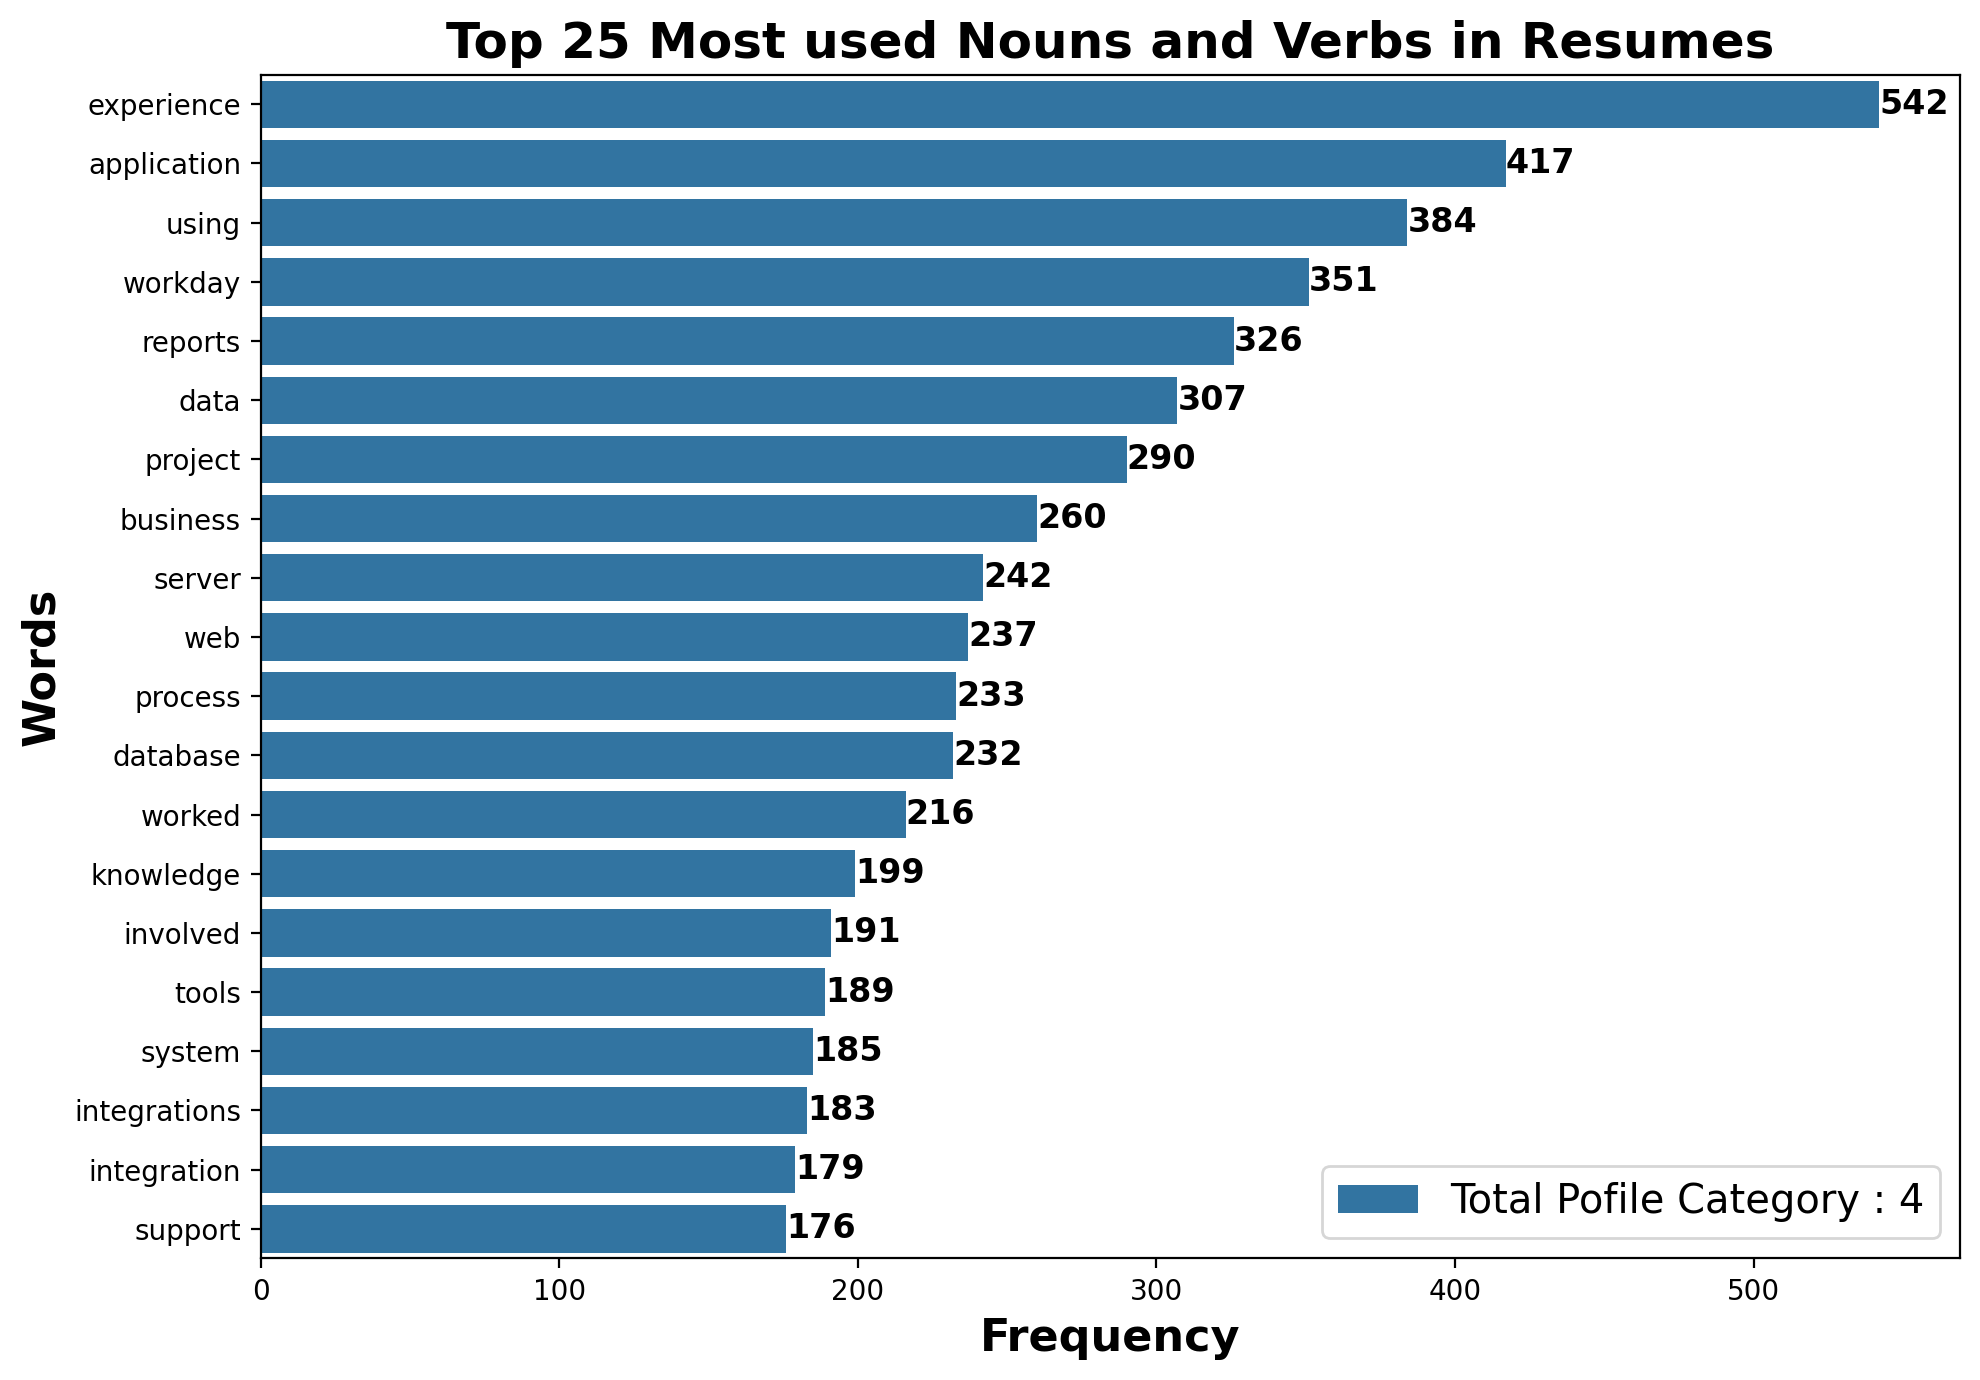

In [44]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data', dpi = 500)

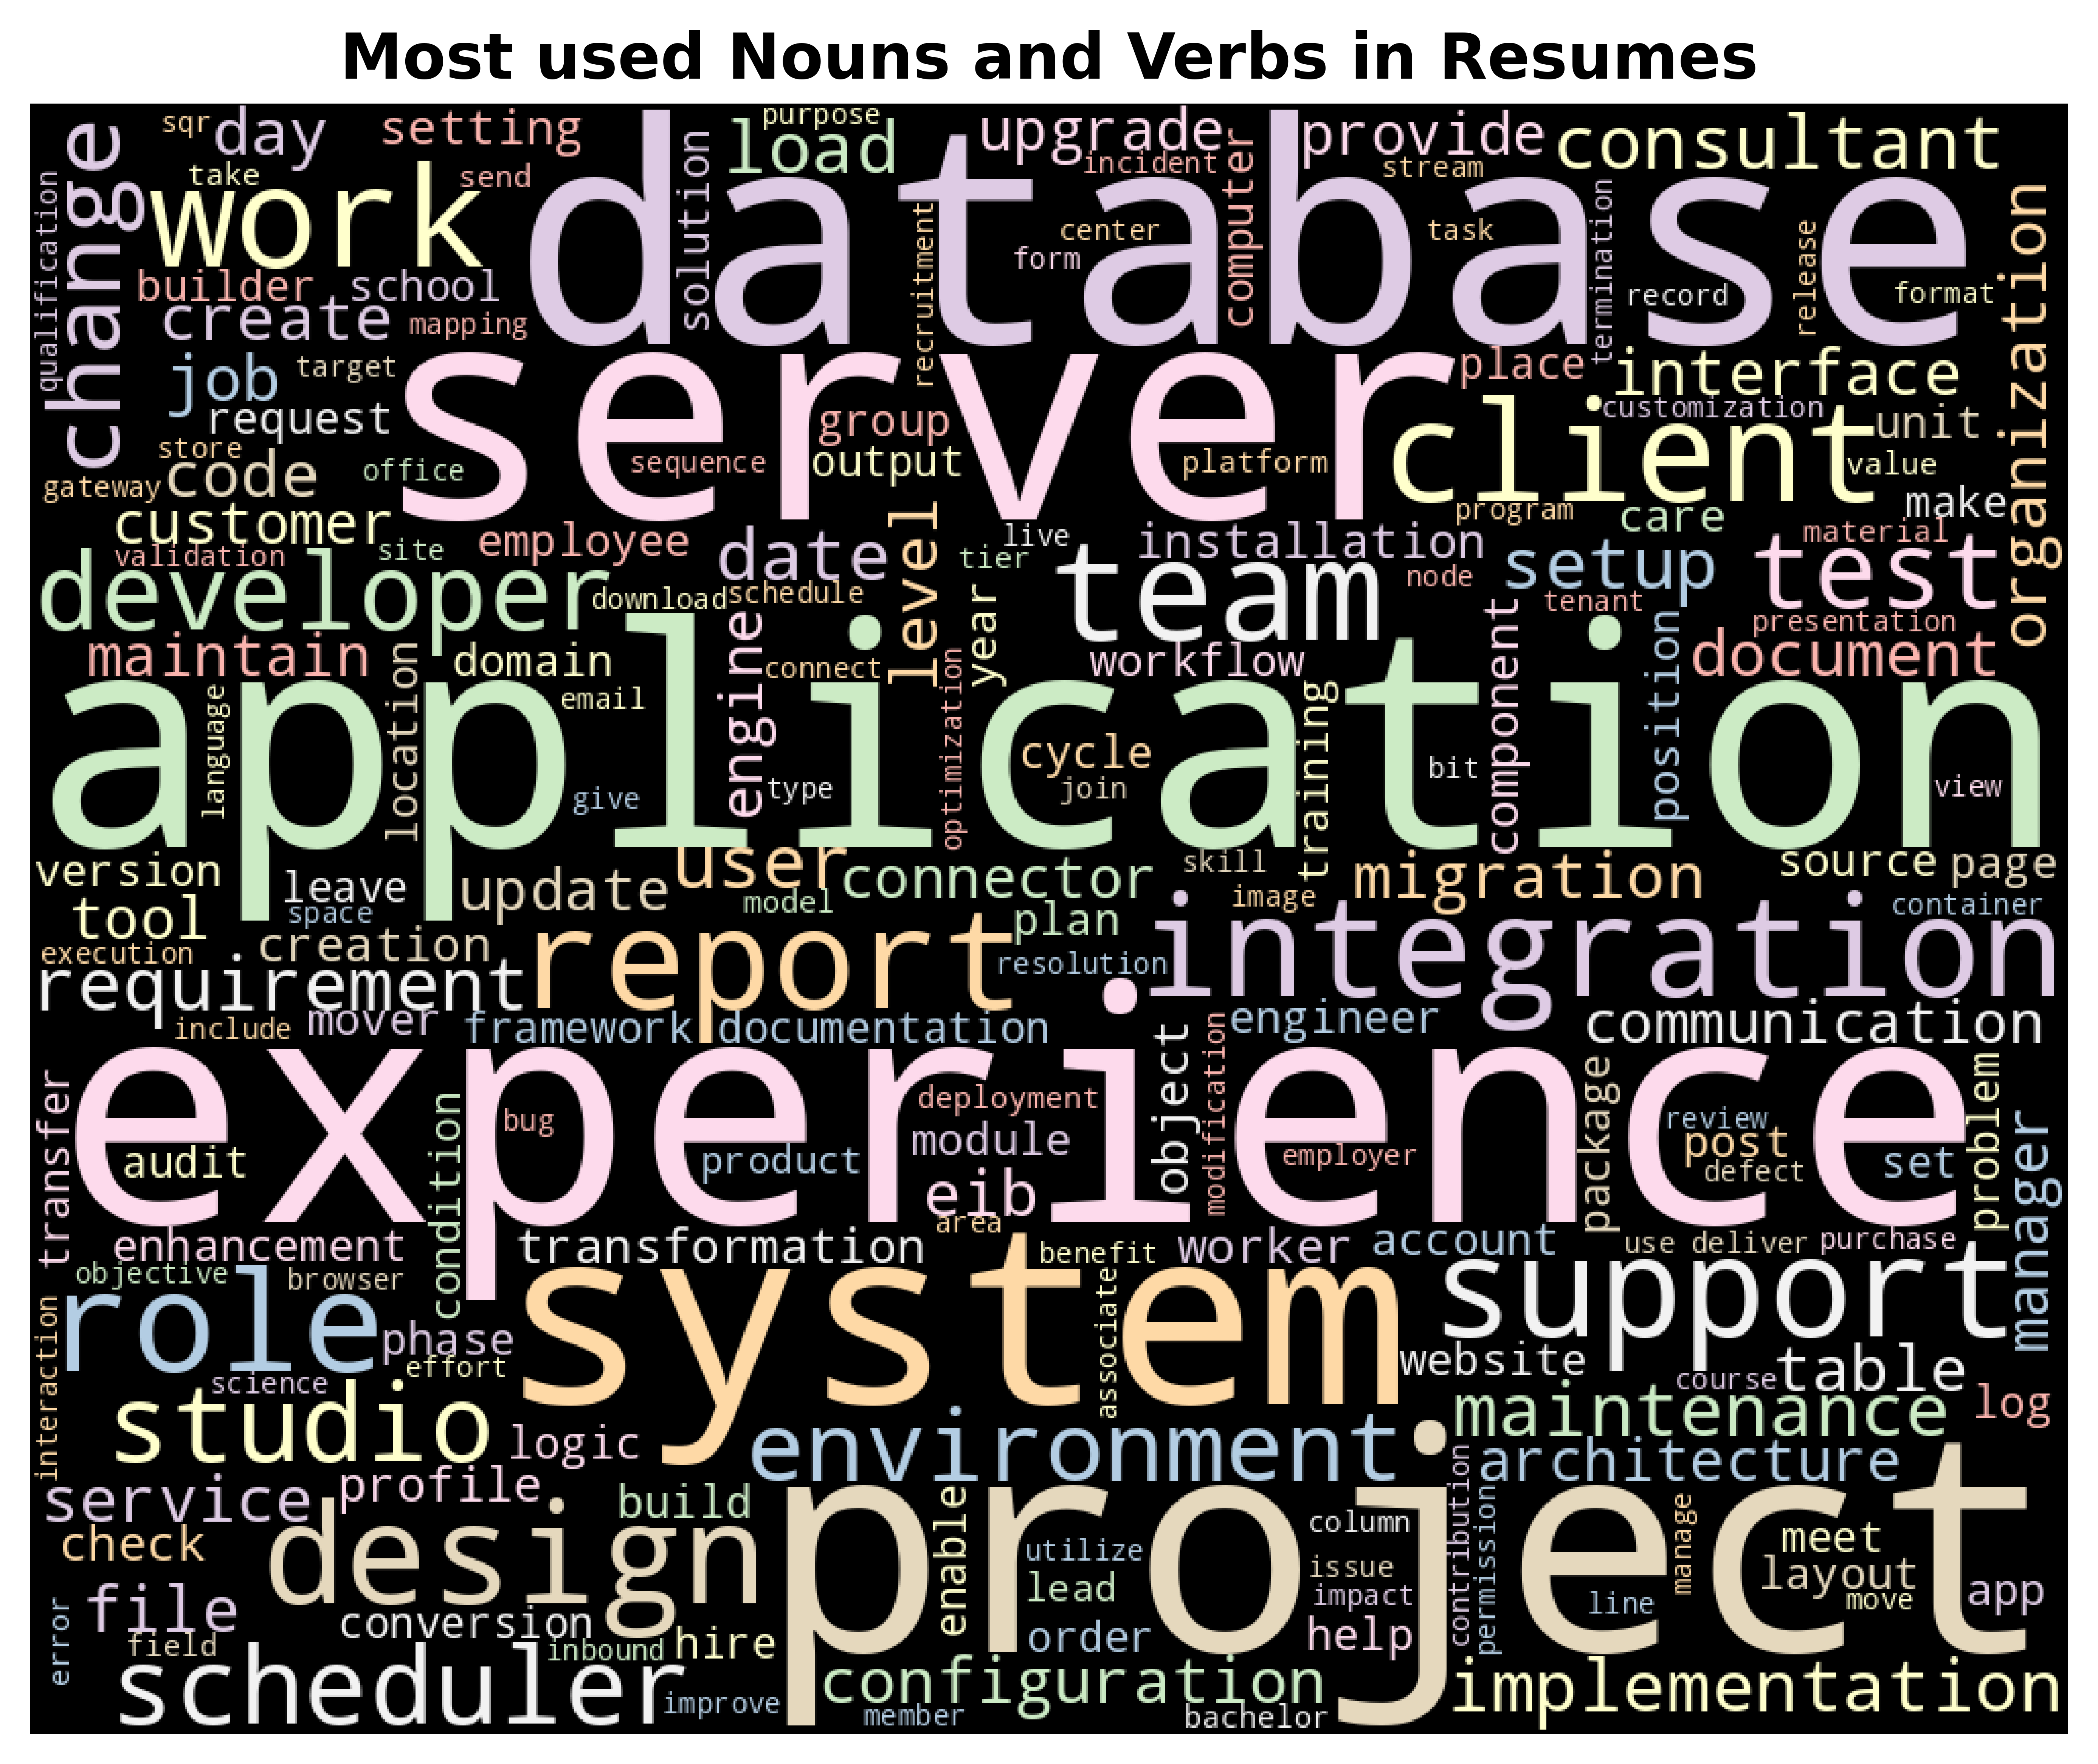

In [45]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('/content/sample_data/Word_Clowds_Noun_Verb.png')
plt.show()

In [46]:

file_path   = r'/content/drive/MyDrive/Resumes2/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [47]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [48]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [49]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

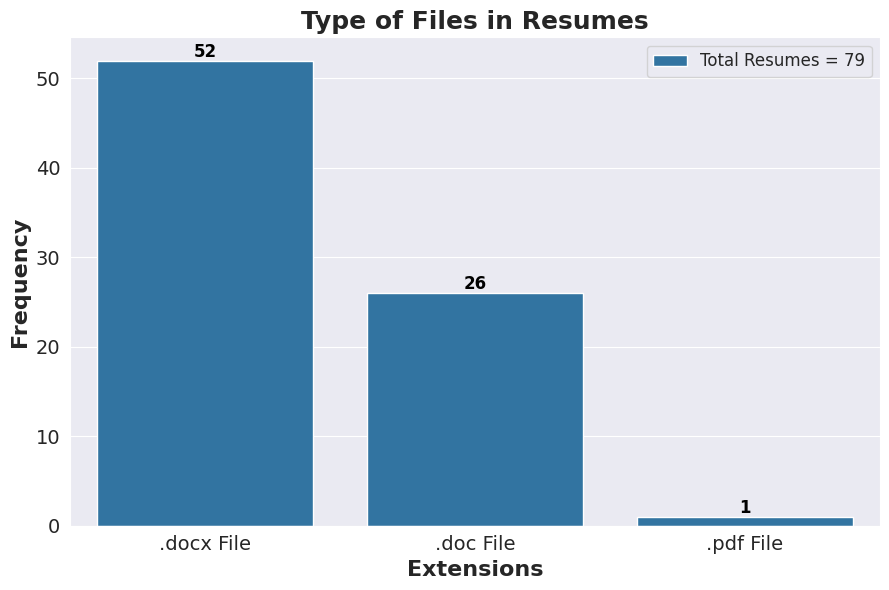

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data\File_Type_Bar', dpi = 500)

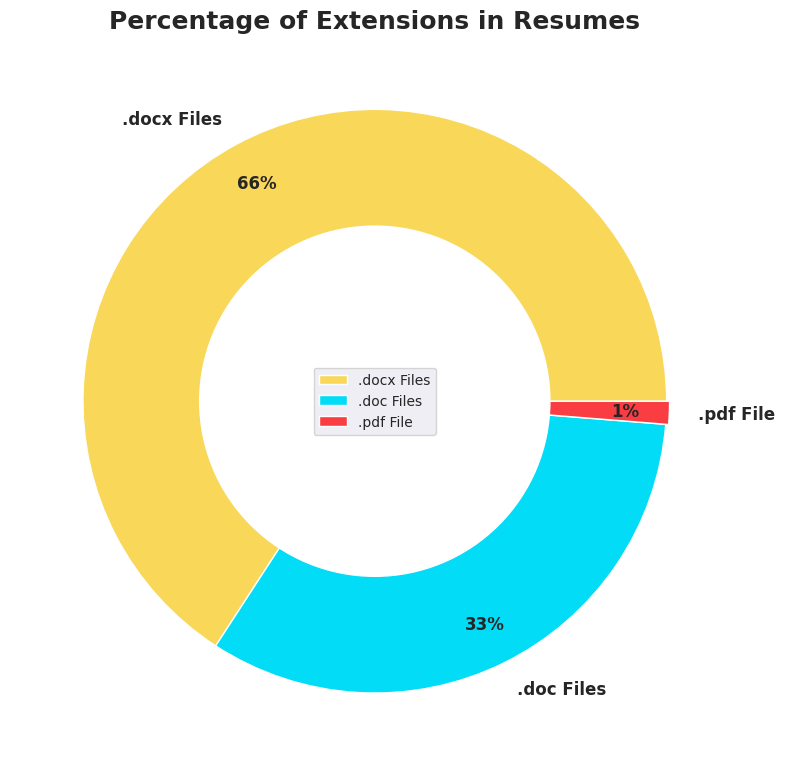

In [51]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data\Per_File_Pai', dpi = 500)

In [52]:
file_path = r'/content/drive/MyDrive/Resumes2/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [53]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Workday,Hari Krishna M_Hexaware.doc
1,Workday,Hima Mendu_Hexaware.doc
2,Workday,MooraboyinaGuravaiah_Hexaware.docx
3,Workday,ShireeshKumar_Hexaware.doc
4,Workday,Vinay Kumar_Hexaware.docx
...,...,...
74,SQL Developer,Rajupavanakumari[2_10].docx
75,SQL Developer,Priyanka L.doc
76,SQL Developer,Anil kumar.docx
77,SQL Developer,Neeraj Mishra.docx


In [54]:
resume_data.Profile.value_counts().index

Index(['React JS Develpoer', 'Workday', 'PeopleSoft', 'SQL Developer'], dtype='object')

In [55]:
resume_data.Profile.value_counts()

React JS Develpoer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Profile, dtype: int64

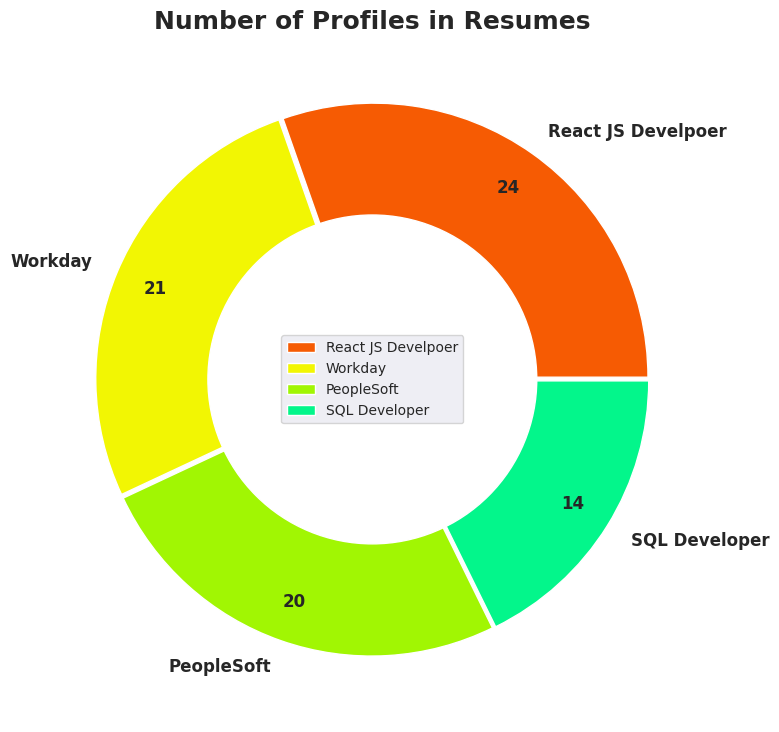

In [56]:
fig = plt.figure(figsize=(8, 8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
# Make sure explode has the same length as sizes
explode = (0.01,) * len(sizes)

plt.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
        pctdistance=0.85, explode=explode, startangle=0, textprops={'size': 'large', 'fontweight': 'bold'})

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data/No_Resume_Pai', dpi=500)


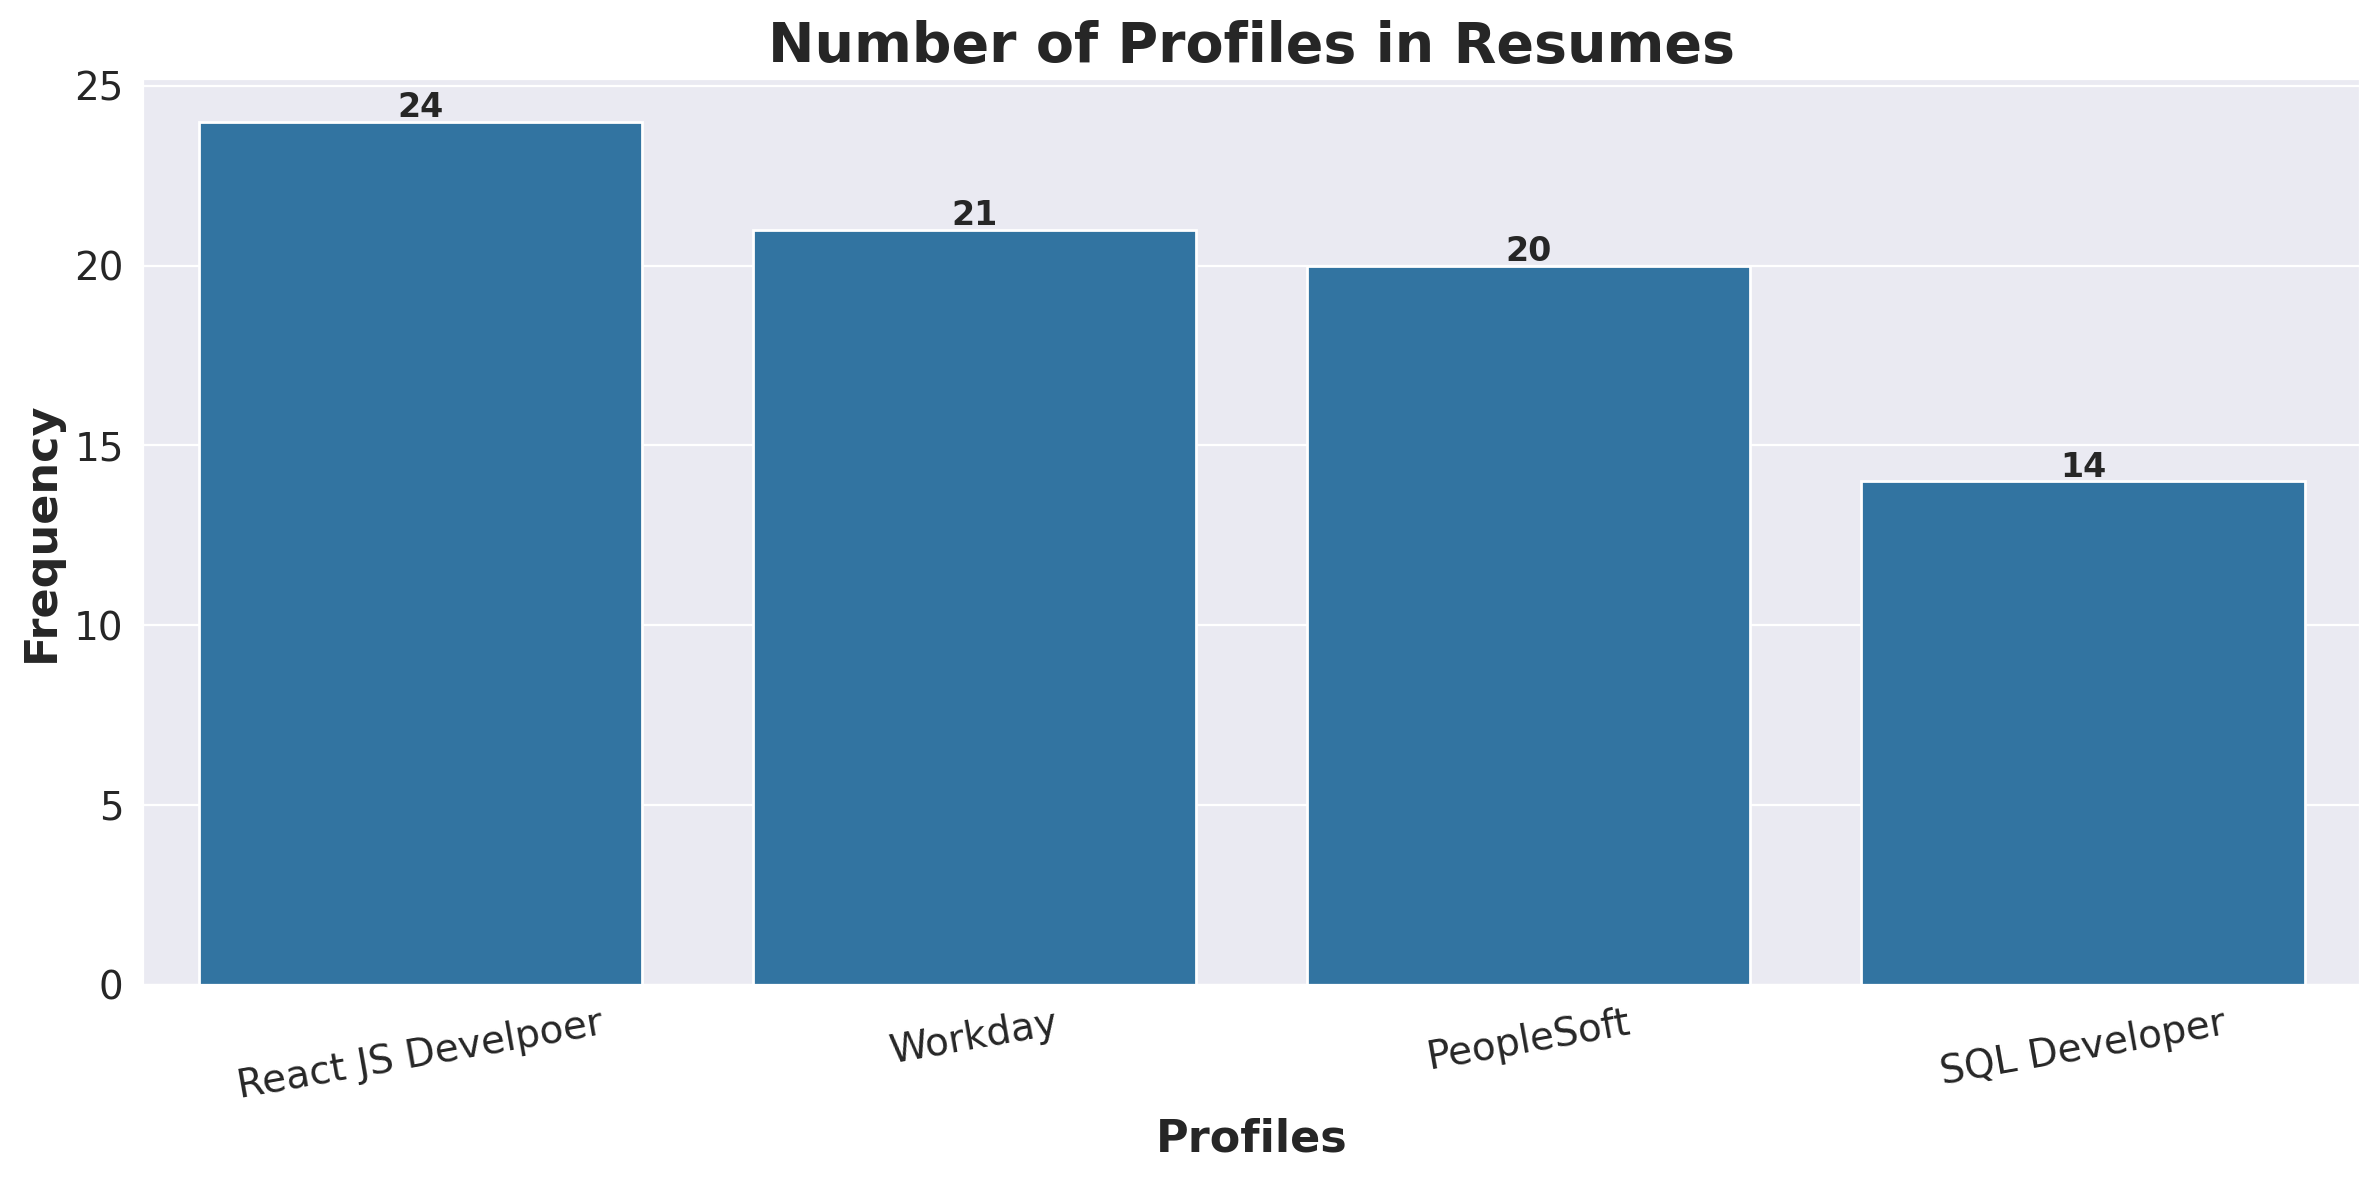

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported your data and have it stored in 'resume_data'

fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
profile_counts = resume_data['Profile'].value_counts()

ax = sns.barplot(x=profile_counts.index, y=profile_counts, ax=axe)
ax.set_xlabel('Profiles', size=16, fontweight='bold')
ax.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=10)
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points',
                 fontsize=12,
                 fontweight='bold')

plt.tight_layout()
plt.show()

# Optionally, save the figure
# fig.savefig('/content/sample_data/No_Resume_Bar.png', dpi=500)


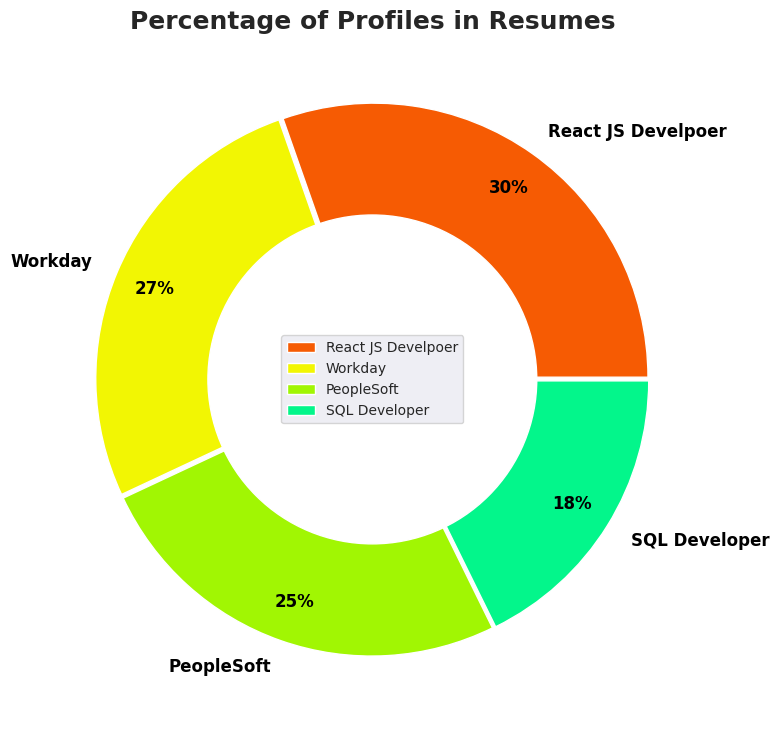

In [58]:
fig = plt.figure(figsize=(8, 8), dpi=100)

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01,) * len(sizes)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.85, explode=explode,
        startangle=0, textprops={'size': 'large', 'fontweight': 'bold', 'rotation': 0, 'color': 'black'})

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data/Per_Cat_Pai', dpi=500)


In [59]:
import docx2txt

def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/drive/MyDrive/Resumes2/React JS Develpoer/React Developer_Deepakreddy.docx'))


Kanumuru Deepak Reddy



 



CAREER OBJECTIVE:



To secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.



ACADEMIC QUALIFICATIONS:





Qualification

Institute

Board (or) University

Year of completion

Percentage/CGPA

B.Tech (E.C.E)

Audisankara College of Engineering & Technology,Gudur.

JNTU Anantapur.

2018

77.3

Intermediate

Narayana Junior college, Naidupet.

Board of

Intermediate, AP.

2014

89.5

SSC

Navodaya High School,Naidupet

Board of Secondary education, AP.

2012

6.7



PROJECT:



Title :Density based Traffic Control System USING ARDUINO.



Duration:4 months.



Description: Traffic congestion is a severe problem in most of the cities across the world and it has become a nightmare for the citizens. It is caused by delay in signal, inappropriate timing of traffic signalling etc. The delay of traffic light is hard coded and it does not depend 

In [60]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,personal details name pritam biswas date birth...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
74,Workday,chinna subbarayudu dob march nationality india...
75,Workday,venkateswarlu workday consultant years experie...
76,Workday,workday integration consultant name sri krishn...
77,Workday,srikanth workday hcm consultant seeking suitab...


In [61]:
!pip install textblob
from textblob import TextBlob
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['personal']),
 WordList(['details']),
 WordList(['name']),
 WordList(['pritam']),
 WordList(['biswas']),
 WordList(['date']),
 WordList(['birth']),
 WordList(['present']),
 WordList(['location']),
 WordList(['pune']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['development']),
 WordList(['support']),
 WordList(['maintenance']),
 WordList(['upgrade']),
 WordList(['peoplesoft']),
 WordList(['project'])]

In [62]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['personal', 'details']),
 WordList(['details', 'name']),
 WordList(['name', 'pritam']),
 WordList(['pritam', 'biswas']),
 WordList(['biswas', 'date']),
 WordList(['date', 'birth']),
 WordList(['birth', 'present']),
 WordList(['present', 'location']),
 WordList(['location', 'pune']),
 WordList(['pune', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'development']),
 WordList(['development', 'support']),
 WordList(['support', 'maintenance']),
 WordList(['maintenance', 'upgrade']),
 WordList(['upgrade', 'peoplesoft']),
 WordList(['peoplesoft', 'project']),
 WordList(['project', 'ibm'])]

In [63]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:30]


[WordList(['personal', 'details', 'name']),
 WordList(['details', 'name', 'pritam']),
 WordList(['name', 'pritam', 'biswas']),
 WordList(['pritam', 'biswas', 'date']),
 WordList(['biswas', 'date', 'birth']),
 WordList(['date', 'birth', 'present']),
 WordList(['birth', 'present', 'location']),
 WordList(['present', 'location', 'pune']),
 WordList(['location', 'pune', 'experience']),
 WordList(['pune', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'development']),
 WordList(['experience', 'development', 'support']),
 WordList(['development', 'support', 'maintenance']),
 WordList(['support', 'maintenance', 'upgrade']),
 WordList(['maintenance', 'upgrade', 'peoplesoft']),
 WordList(['upgrade', 'peoplesoft', 'project']),
 WordList(['peoplesoft', 'project', 'ibm']),
 WordList(['project', 'ibm', 'currently']),
 WordList(['ibm', 'currently', 'working']),
 WordList(['currently', 'working

In [64]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     personal details name pritam biswas date birth...
2     profile summary years experience implementing ...
3     classification internal classification interna...
4     peoplesoft admin varkala vikas career objectiv...
                            ...                        
74    chinna subbarayudu dob march nationality india...
75    venkateswarlu workday consultant years experie...
76    workday integration consultant name sri krishn...
77    srikanth workday hcm consultant seeking suitab...
78    workday hcm fcm name kumar role workday consul...
Name: Resume_Details, Length: 79, dtype: object

In [65]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [66]:
df_ngram

,Frequency,Unigram_Bigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
...,...,...
25684,1,abilities telugu
25685,1,abilities skills
25686,1,abilities problem
25687,1,abilities good


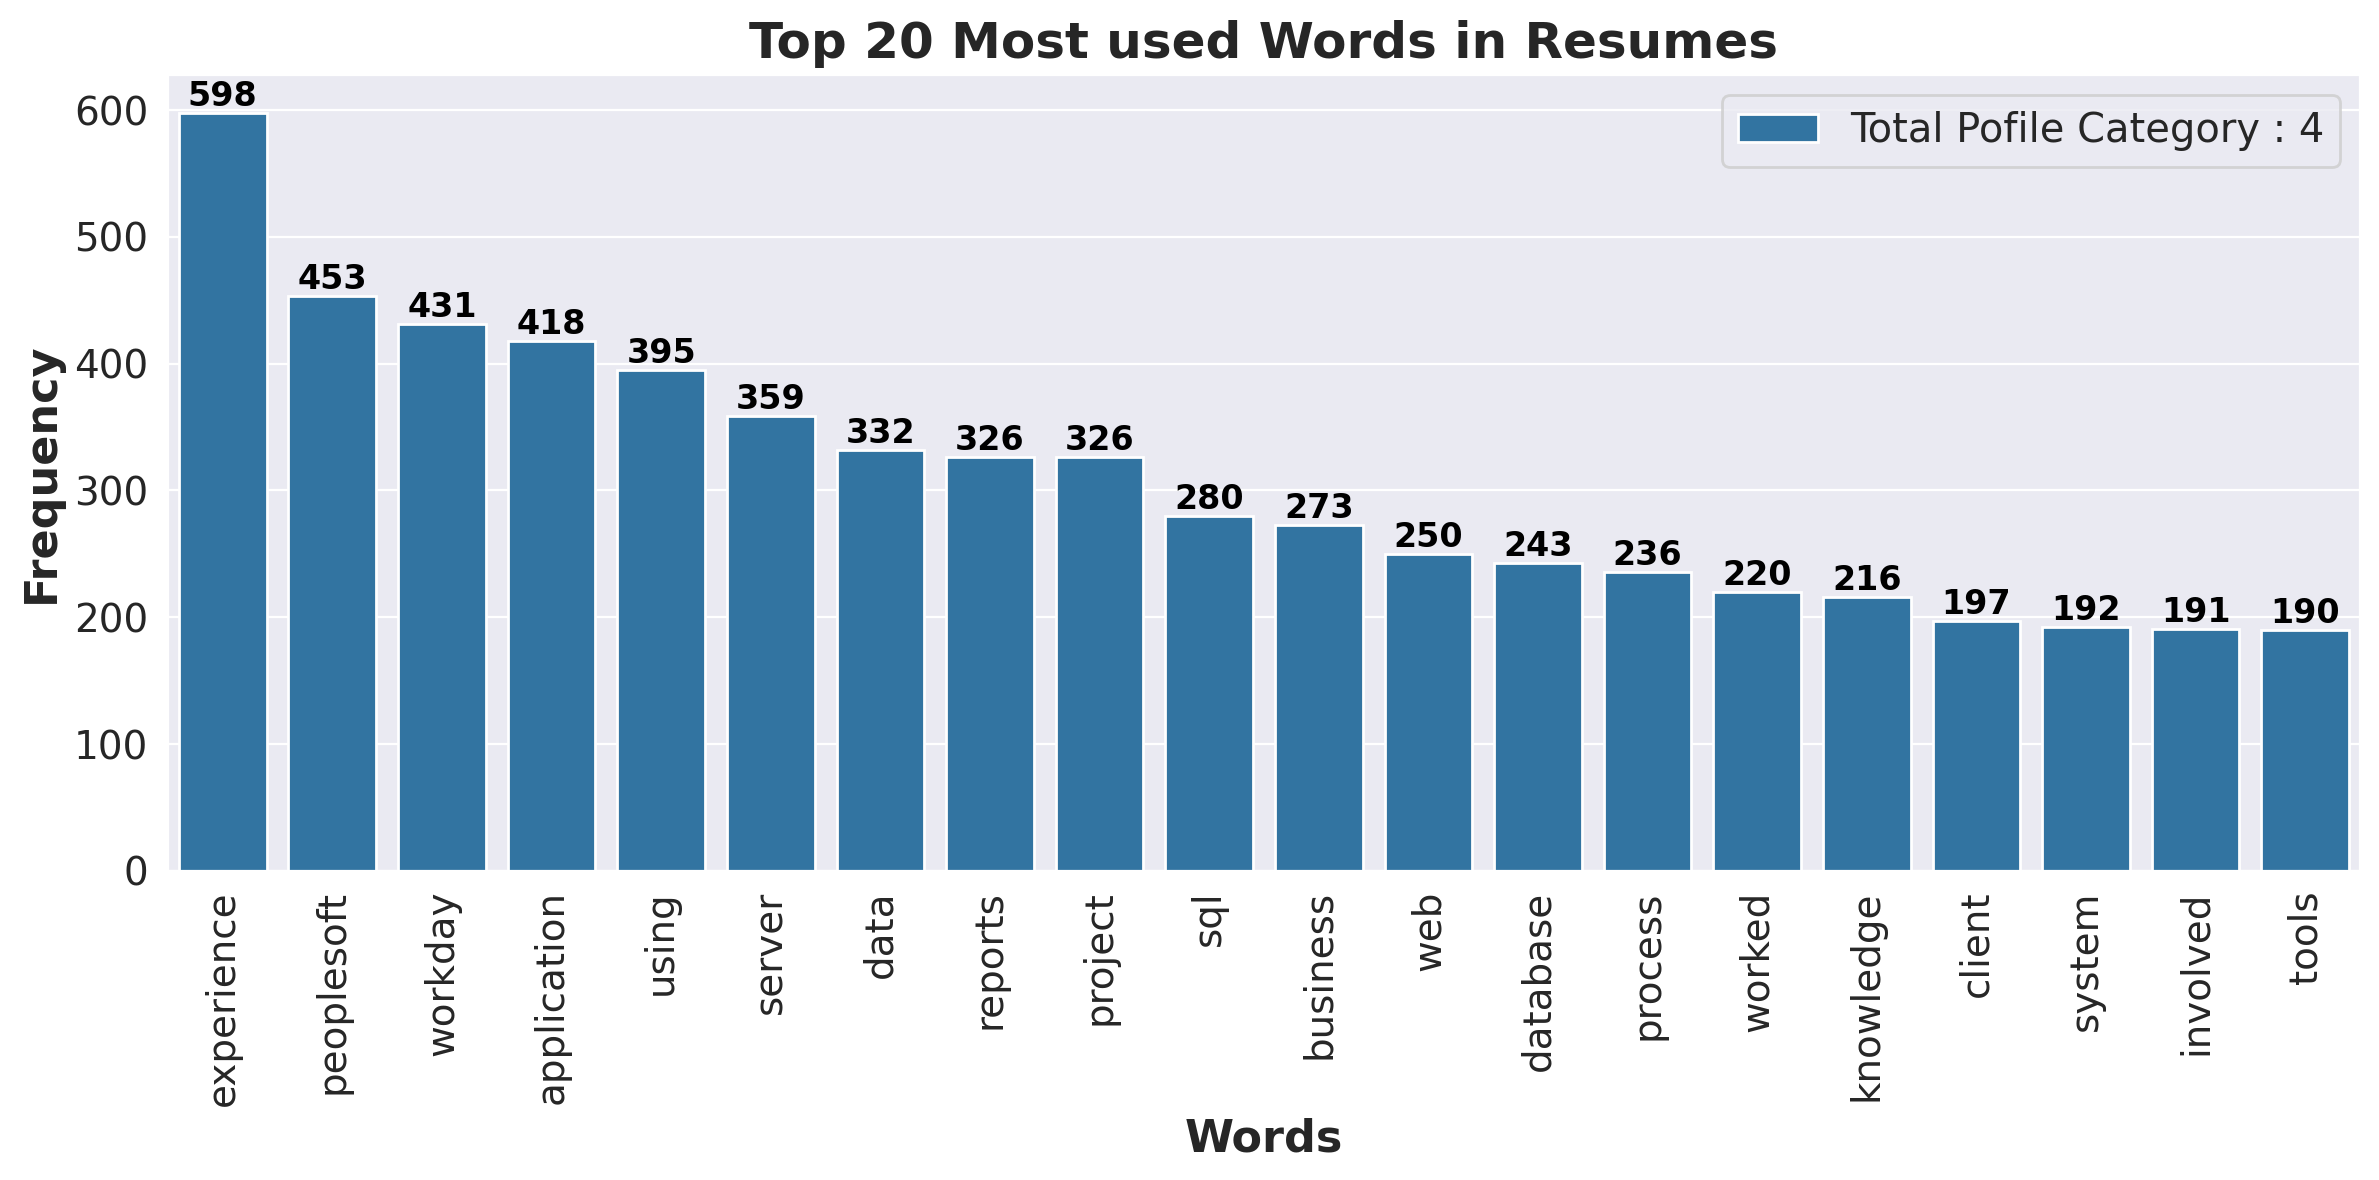

In [67]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/sample_data/Top_Words_Bar', dpi = 500)

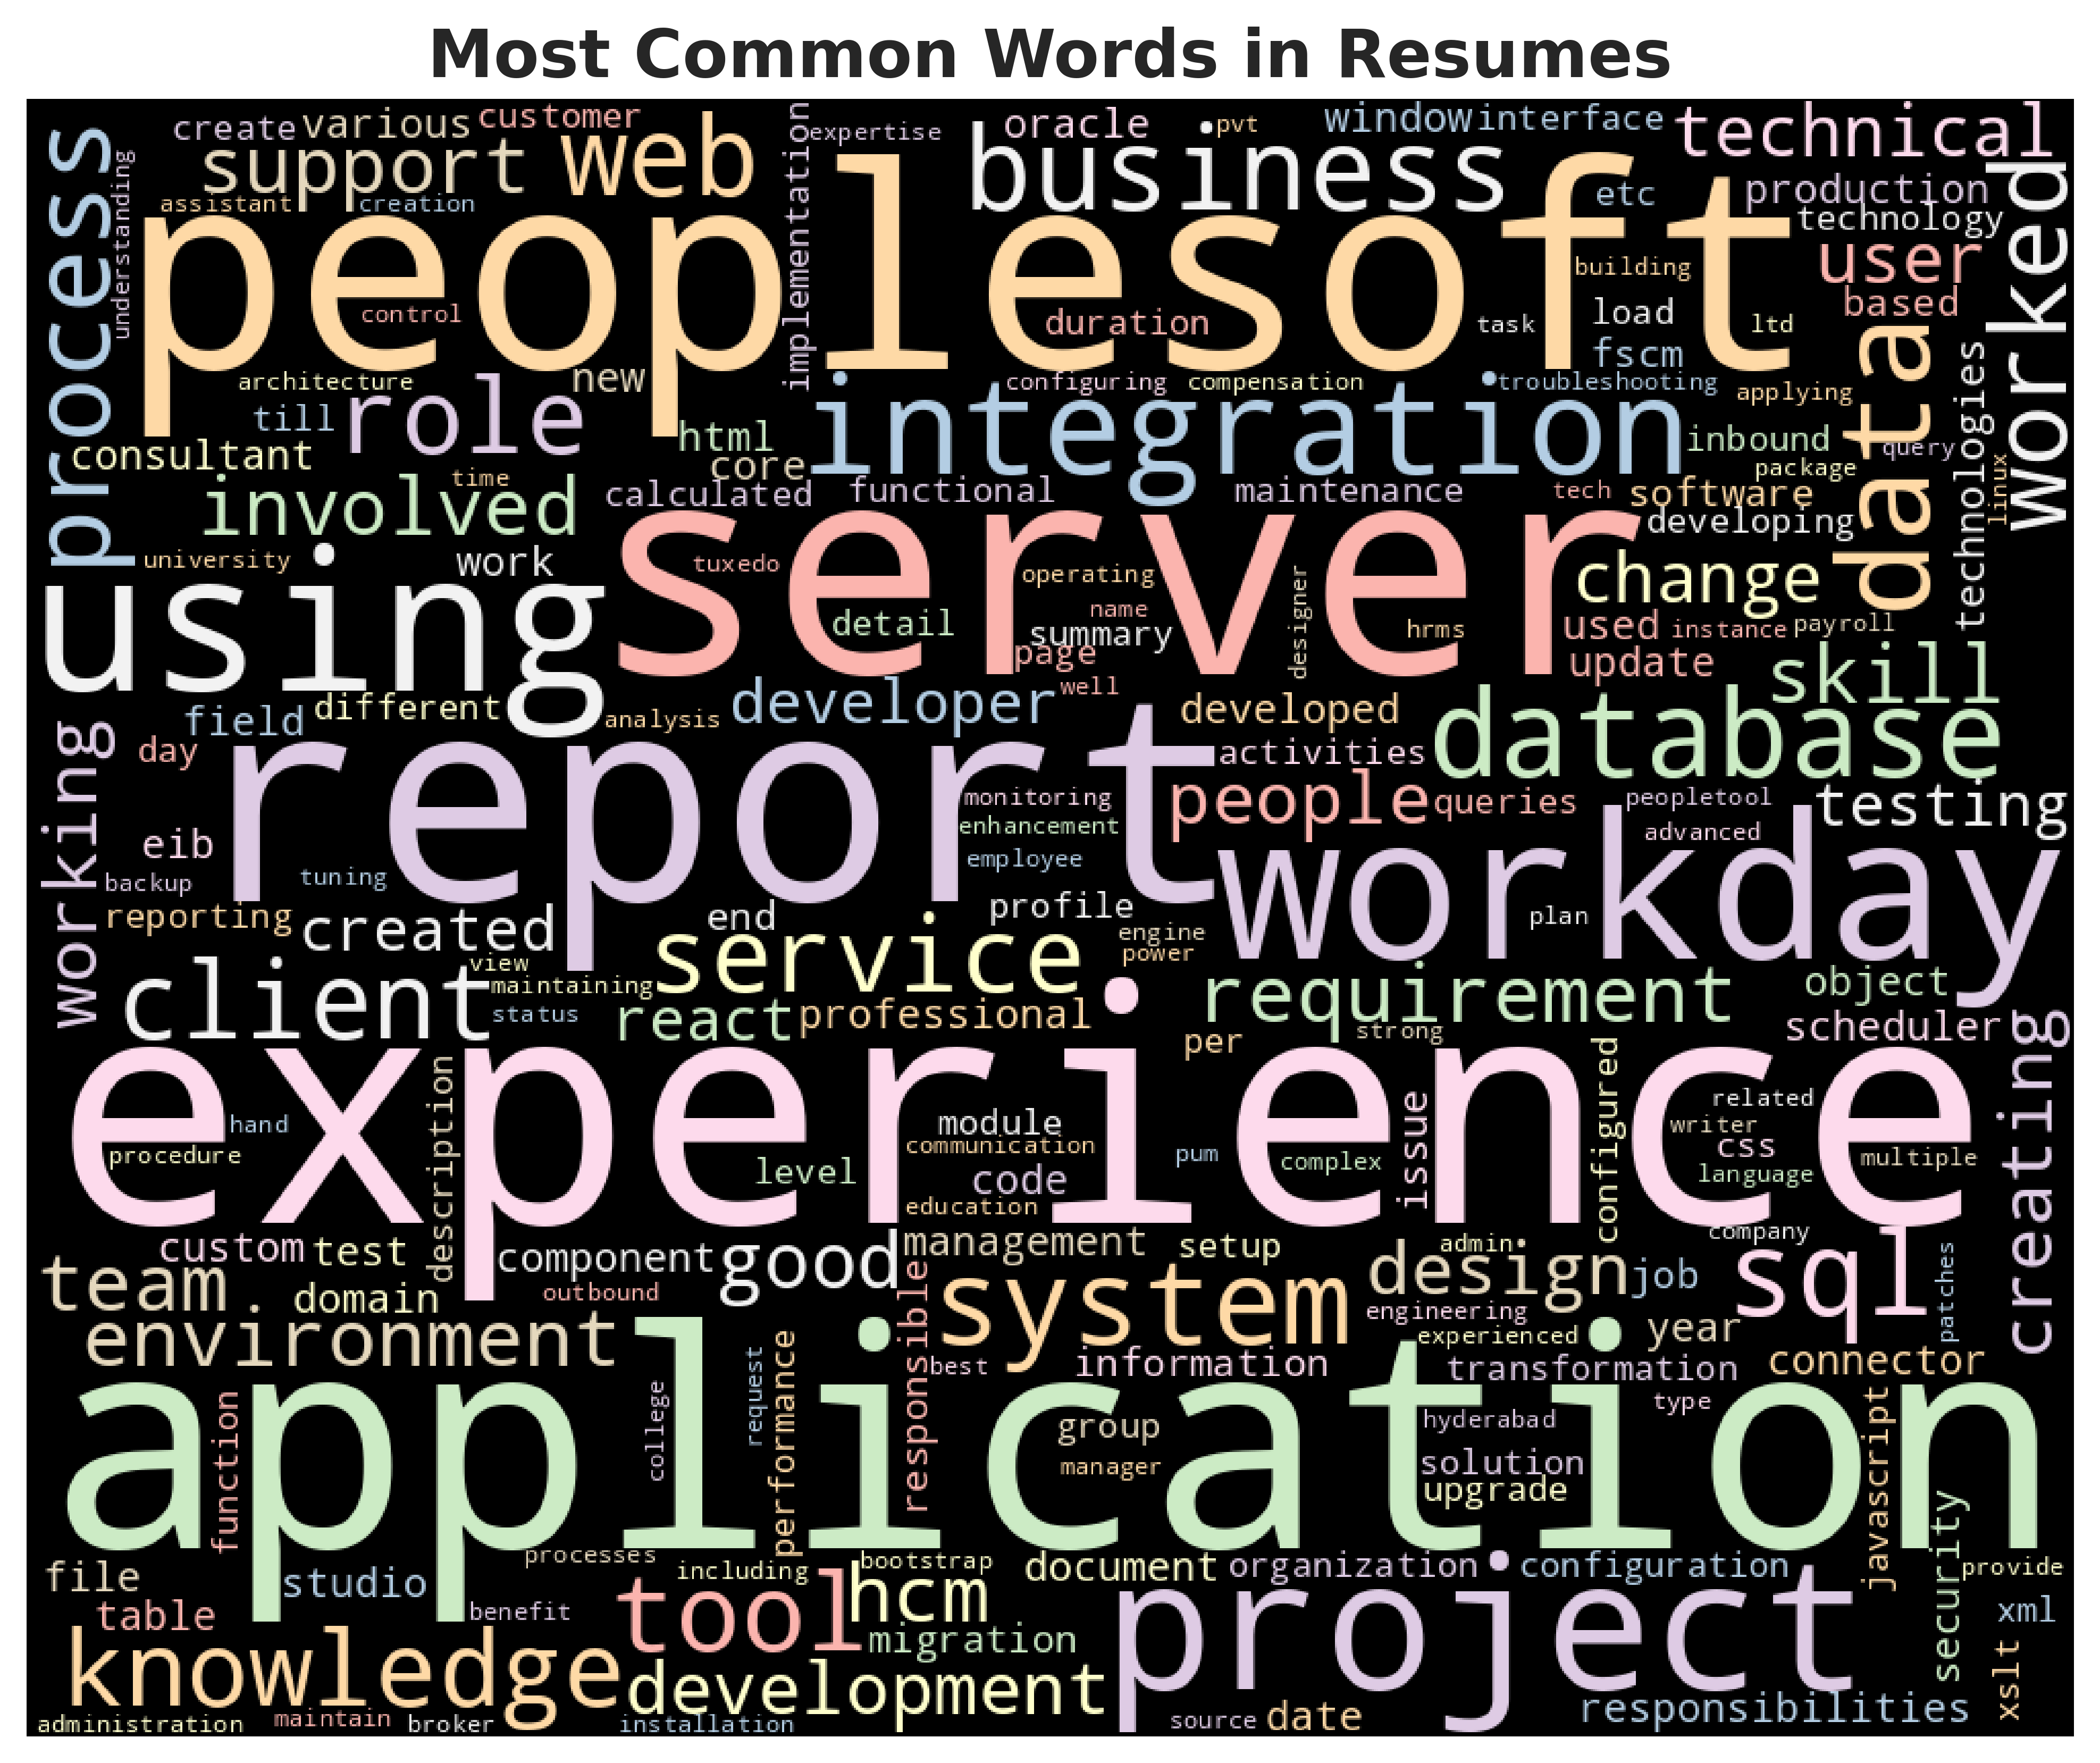

In [68]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('/content/sample_data/Word_Clowds.png')
plt.show()

In [69]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,personal details name pritam biswas date birth...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...


In [70]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,0
1,PeopleSoft,personal details name pritam biswas date birth...,0
2,PeopleSoft,profile summary years experience implementing ...,0
3,PeopleSoft,classification internal classification interna...,0
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,0
...,...,...,...
74,Workday,chinna subbarayudu dob march nationality india...,3
75,Workday,venkateswarlu workday consultant years experie...,3
76,Workday,workday integration consultant name sri krishn...,3
77,Workday,srikanth workday hcm consultant seeking suitab...,3


In [71]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [72]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [73]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [76]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [77]:
x_train.shape, x_test.shape

((59, 3705), (20, 3705))

In [78]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft'
 'PeopleSoft' 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday'
 'Workday' 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']
['PeopleSoft' 'PeopleSoft' 'React JS Developer' 'Workday' 'Workday'
 'React JS Developer' 'R

(None, None)

In [79]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [80]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.61
Accuracy of  test set    : 0.55
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.38      1.00      0.56         5

          accuracy                           0.55        20
         macro avg       0.35      0.50      0.39        20
      weighted avg       0.40      0.55      0.44        20




In [81]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [82]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [83]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [84]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [85]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [86]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [87]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [88]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [89]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.610169,0.55,0.35,0.5,0.39
1,DecisionTree Classifier,1.000000,1.00,1.00,1.0,1.00
2,RandomForest Classifier,1.000000,1.00,1.00,1.0,1.00
3,SVM Classifier,1.000000,1.00,1.00,1.0,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.0,1.00
5,Bagging Classifier,0.983051,1.00,1.00,1.0,1.00
6,AdaBoost Classifier,1.000000,1.00,1.00,1.0,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.0,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.0,1.00


In [90]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

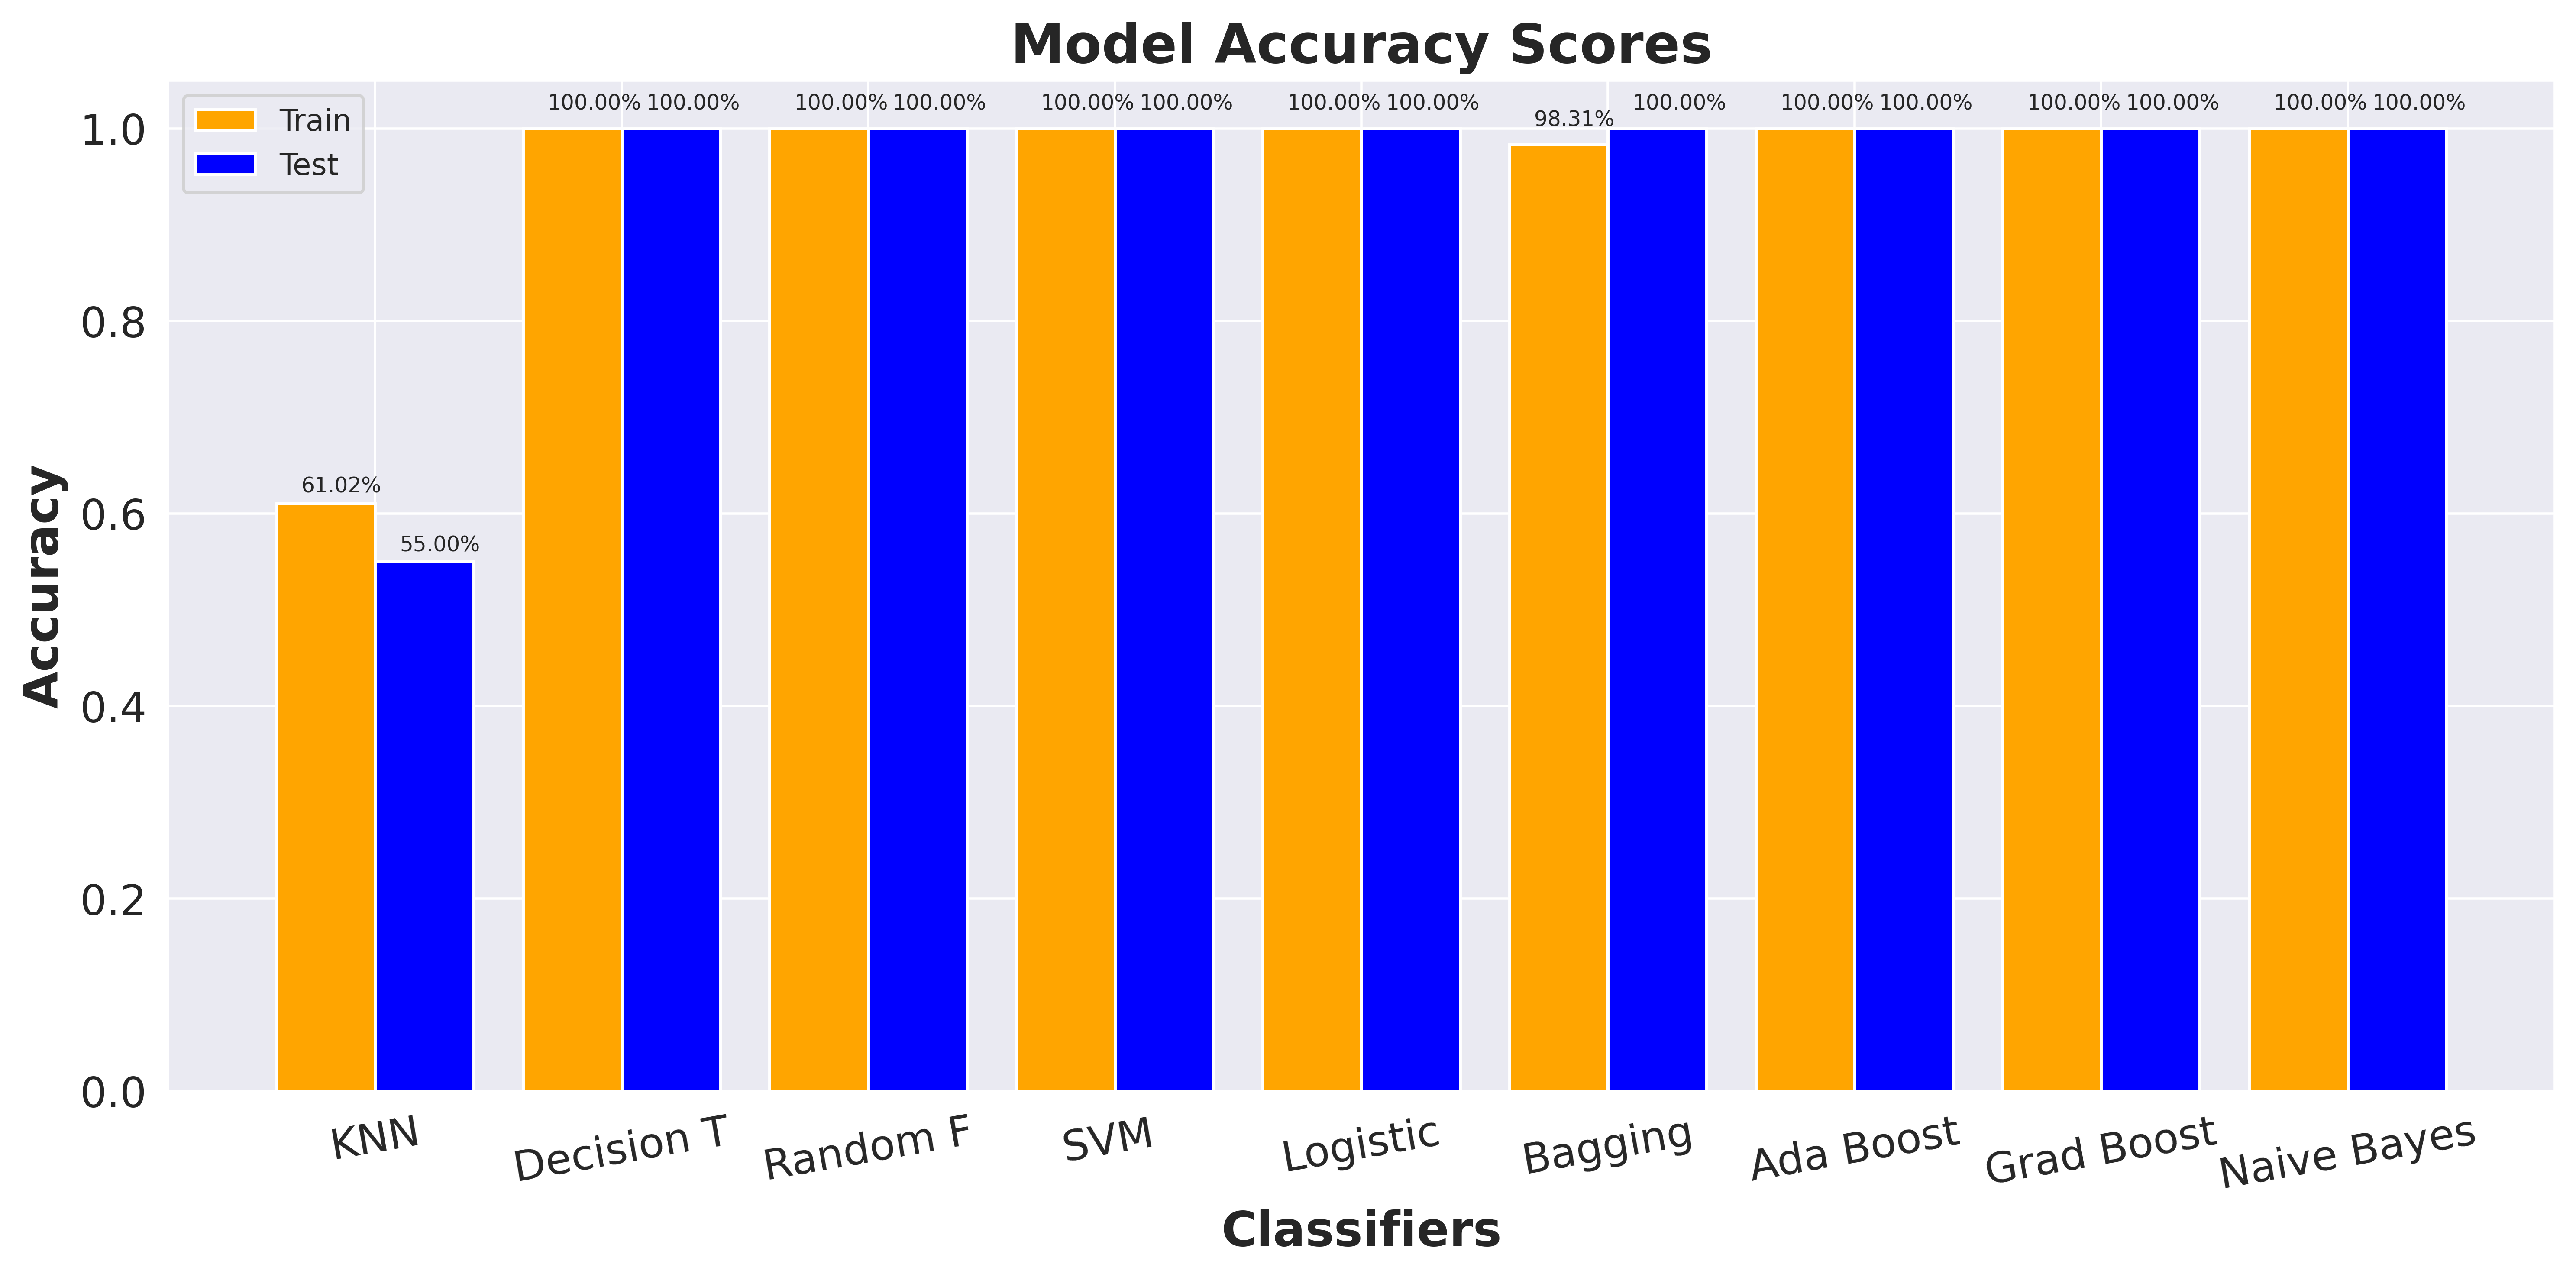

In [91]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

# Model Deployment

In [92]:
import pickle
filename = 'model_DT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [93]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))